In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
npy_dir = '../../dataset/image_formation/20231007/npy_data'

sample_pts = np.array([[10 + i*120, 50 + j*51] for j in range(10) for i in range(8)])
sample_pts_flatt = np.array([[sample_pts[i,0]+sample_pts[i,1]*890] for i in range(sample_pts.shape[0])]).squeeze()

wvl_list = np.array([430, 600, 610, 620, 640, 650, 660])

idx_list = np.array([3 + 8*i for i in range(10)])

### Max datas

In [132]:
max_data_front = np.load(os.path.join(npy_dir, 'max_data_front.npy'))
max_data_mid = np.load(os.path.join(npy_dir, 'max_data_mid.npy'))
max_data_mid2 = np.load(os.path.join(npy_dir, 'max_data_mid2.npy'))
max_data_mid3 = np.load(os.path.join(npy_dir, 'max_data_mid3.npy'))
max_data_back = np.load(os.path.join(npy_dir, 'max_data_back.npy'))

In [83]:
# max_data_front_cp[3,:200,sample_pts_flatt[79]].max()

0.08295231555657281

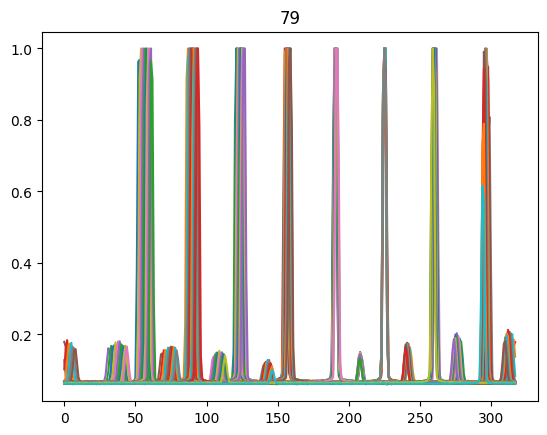

In [133]:
w_idx = 2
max_data_front_cp = max_data_back.copy()   
     
medians = np.median(max_data_front_cp, axis=1)  # Find median along the second axis for each pixel and wavelength

mask1 = (medians > 0.07) & (medians < 0.09)
mask2 = medians >= 0.09
mask3 = np.min(max_data_front_cp, axis=1) <= 0.06

# Adjusting the masks to match the shape of max_data
mask1 = mask1[:, np.newaxis, :]
mask2 = mask2[:, np.newaxis, :]
mask3 = mask3[:, np.newaxis, :]

# Further broadcast the masks to the shape of max_data
mask1_broadcasted = np.repeat(mask1, 318, axis=1)
mask2_broadcasted = np.repeat(mask2, 318, axis=1)
mask3_broadcasted = np.repeat(mask3, 318, axis=1)

# Applying the conditions to update max_data
max_data_front_cp[mask1_broadcasted] -= 0.02
max_data_front_cp[mask2_broadcasted] -= 0.03
max_data_front_cp[mask3_broadcasted] += 0.008
        
for idx, i in enumerate(sample_pts_flatt):
    # if idx in idx_list:
    #     plt.figure(figsize=(5,3))
    #     plt.ylim([0,0.08])
    #     if (np.median(max_data_front_cp[w_idx,:,i]) > 0.07) and (np.median(max_data_front_cp[w_idx,:,i]) < 0.09):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.02
    #     if (np.median(max_data_front_cp[w_idx,:,i]) >= 0.09):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.03
    #     if(max_data_front_cp[w_idx,:,i].min() <= 0.06):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] + 0.008

        plt.plot(max_data_front_cp[w_idx,:,i]), plt.title(idx)

In [134]:
max_data_front.shape

(7, 318, 516200)

In [155]:
np.argmax(max_data_mid3[-1,:100,sample_pts_flatt[-4]])

30

In [156]:
np.argmax(max_data_mid3[-2,:100,sample_pts_flatt[-4]])

33

In [163]:
max_data_mid3[-1,:100,sample_pts_flatt[-4]].max()

0.14599832150759137

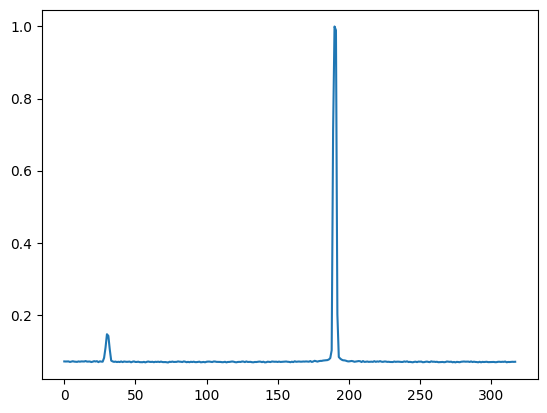

In [162]:
plt.plot(max_data_mid3[-1,:,sample_pts_flatt[-4]])

In [114]:
# w_idx = 2
# for idx, i in enumerate(sample_pts_flatt):
#         plt.figure(figsize=(5,3))
#         plt.ylim([0,0.08])
#         plt.plot(max_data_front_cp[w_idx,:,i]), plt.title(idx)

### Peak illum index

In [179]:
front_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_front.npy'))
mid_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid.npy'))
mid2_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid2.npy'))
mid3_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid3.npy'))
back_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_back.npy'))

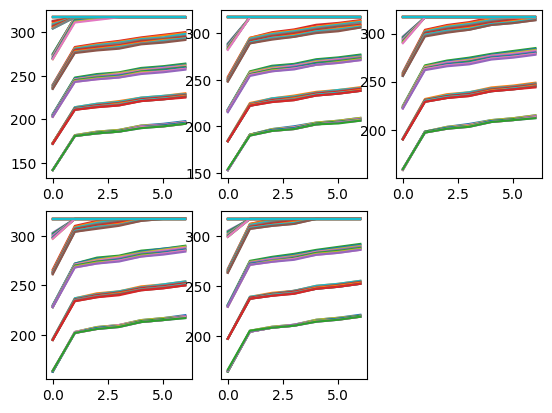

In [5]:
m_idx = 2
for i in range(len(sample_pts)):
    plt.subplot(231), plt.plot(front_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(232), plt.plot(mid_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(233), plt.plot(mid2_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(234), plt.plot(mid3_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(235), plt.plot(back_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])

In [250]:
print(front_peak_illum_idx[:,-1,sample_pts_flatt[-4]])
print(mid_peak_illum_idx[:,-1,sample_pts_flatt[-4]])
print(mid2_peak_illum_idx[:,-1,sample_pts_flatt[-4]])
print(mid3_peak_illum_idx[:,-1,sample_pts_flatt[-4]])
print(back_peak_illum_idx[:,-1,sample_pts_flatt[-4]])

[  7. 166. 317.]
[ 19. 178. 317.]
[ 25. 185. 317.]
[ 30. 190. 317.]
[ 32. 191. 317.]


In [180]:
back_peak_illum_idx.shape

(3, 7, 516200)

In [192]:
back_peak_illum_idx[0,:,sample_pts_flatt[-4]]
front_peak_illum_idx[0,:,sample_pts_flatt[-4]]
mid2_peak_illum_idx[0,:,sample_pts_flatt[-4]]
mid3_peak_illum_idx[0,:,sample_pts_flatt[-4]]

array([87., 44., 43., 40., 36., 33., 30.])

### Depth peak illum idx

In [3]:
depth_peak_illum_idx = np.load(os.path.join(npy_dir,'depth_peak_illum_idx.npy'))

In [4]:
depth_peak_illum_idx[20,0,:,-4]

array([73.87843545, 32.67094914, 32.11959588, 29.60660986, 25.63897426,
       21.1831698 , 18.00142995])

In [5]:
sample_pts_flatt[-4], sample_pts_flatt[76]

(453500, 453500)

In [6]:
depth_peak_illum_idx.shape

(301, 3, 7, 80)

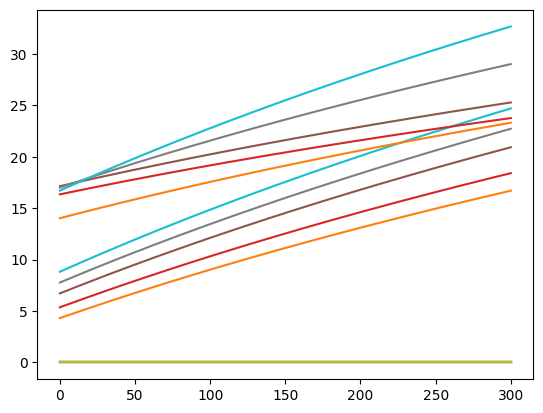

In [24]:
plt.plot(depth_peak_illum_idx[:,0,-1,::4])

In [246]:
sample_pts_flatt[-4], sample_pts[-4]

(453500, array([490, 509]))

In [13]:
# for i in range(3):
#     for w_idx, w in enumerate(wvl_list):
#         plt.figure(figsize=(5,3))
#         plt.ylim([0, 318])
#         plt.plot(depth_peak_illum_idx[:,i,w_idx,3]), plt.title('%d order, %dnm'%(i, w))

### Depth peak illum idx final

In [11]:
depth_peak_illum_idx_final = np.load(os.path.join(npy_dir,'depth_peak_illum_idx_final.npy'))

In [12]:
(depth_peak_illum_idx_final < 0).sum()

0

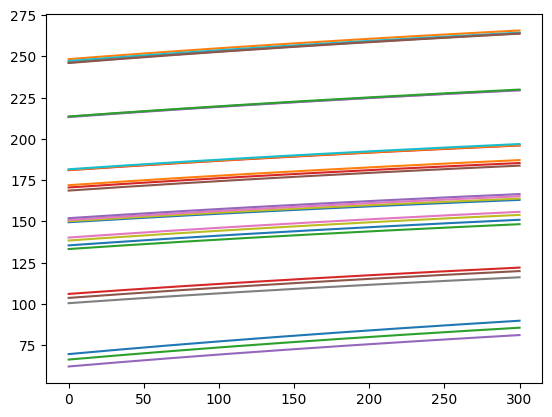

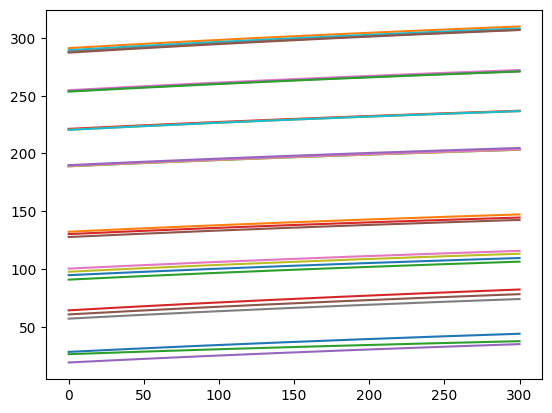

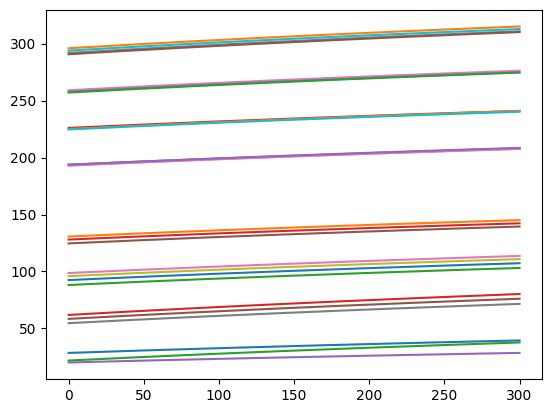

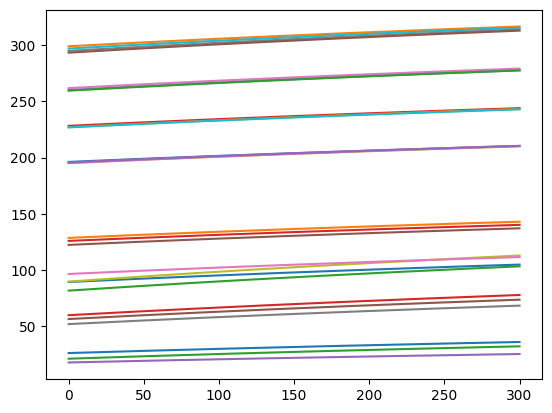

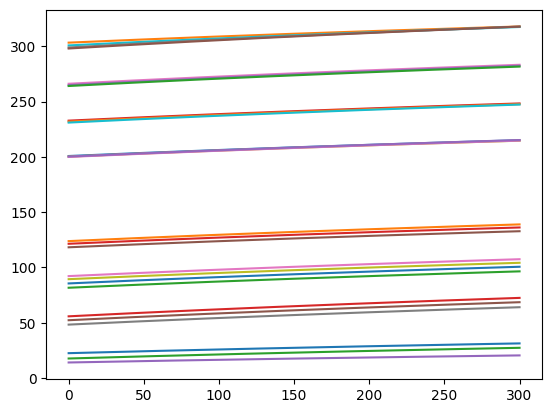

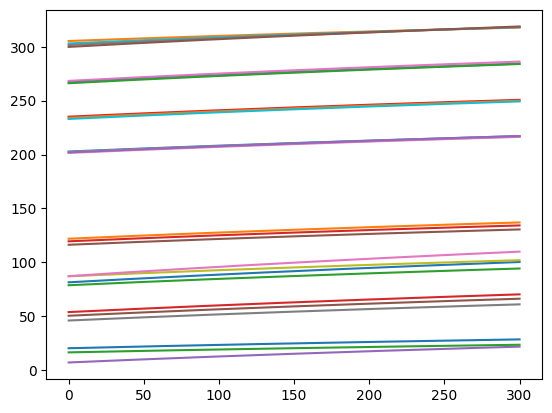

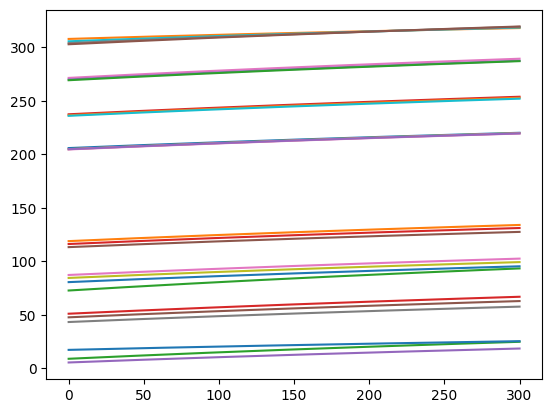

In [18]:
for i in range(7):
    plt.figure()
    plt.plot(depth_peak_illum_idx_final[:,1,i,::3])

In [15]:
# for w_idx, w in enumerate(wvl_list):
#     plt.figure(figsize=(5,3))

#     plt.plot(depth_peak_illum_idx_final[:,1,w_idx,-4]), plt.title('%snm'%(w))

### diffs.npy

In [86]:
diffs = np.load(os.path.join(npy_dir, 'diffs.npy'))

In [113]:
diffs.shape

(301, 580, 890)

In [112]:
diffs.min()

51.07898551310368

(<matplotlib.image.AxesImage at 0x1e8a47f4588>,
 <matplotlib.colorbar.Colorbar at 0x1e8dfb2a588>)

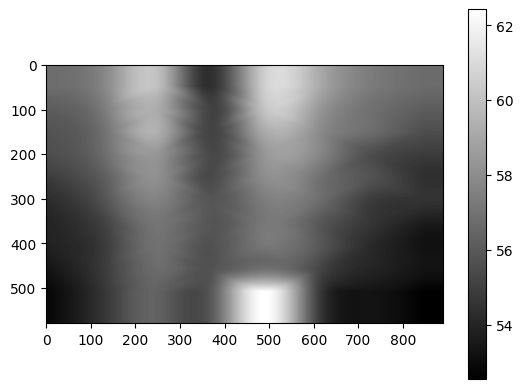

In [111]:
plt.imshow(diffs[200], cmap='gray'), plt.colorbar()

In [96]:
diffs[0].min()

51.07898551310368

### Peak image illum idx

In [196]:
peak_image_illum_idx= np.load(os.path.join(npy_dir, 'peak_image_illum_idx.npy'))

In [197]:
peak_image_illum_idx.shape

(301, 2, 516200, 2)

In [202]:
peak_image_illum_idx_reshape = peak_image_illum_idx.reshape(301,2,580,890,2)

In [211]:
peak_image_illum_idx_reshape[130,1,260,420]

array([56.19582909, -0.43562039])

In [ ]:
depth_peak_illum_idx_final